In [1]:
#install psycopg2 as database connector to Postgres
#pip install psycopg2

In [2]:
#import create_engine from sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

#import URI
from uri import uri

#create & connect to engine
engine = create_engine (uri)
connection = engine.connect()

([<matplotlib.axis.XTick at 0x2b602922400>,
 <a list of 10 Text xticklabel objects>)

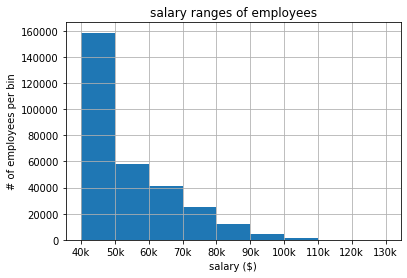

In [3]:
#histogram of most common salary ranges for employees

#import salaries table to dataframe
salaries_df = pd.read_sql_table ("salaries", con = engine)

#create own bins (rather than auto-generated ones); min 40k, max 130k
salary_bins = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]

#create histogram w/ custom bins
plt.hist (salaries_df['salary'],
          bins = salary_bins)

#label axes & title, add grid
plt.xlabel ('salary ($)')
plt.ylabel ('# of employees per bin')
plt.title ('salary ranges of employees')
plt.grid ()

#change tick labels
tick_loc = [x for x in salary_bins]
plt.xticks (tick_loc, ['40k', '50k', '60k', '70k', '80k', '90k', '100k', '110k', '120k', '130k'])

In [4]:
#bar chart of average salary by title

#import employee table & title table to dataframe
emps_df = pd.read_sql_table ("emps", con = engine)
titles_df = pd.read_sql_table ("titles", con = engine)

#join employee, title, & salary info
es_df = pd.merge (emps_df, salaries_df, on = 'emp_num', how = 'left')
est_df = pd.merge (es_df, titles_df, on = 'title_id', how = 'left')

est_df.head()

,emp_num,title_id,dob,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422,Engineer
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973,Engineer
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000,Senior Engineer


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

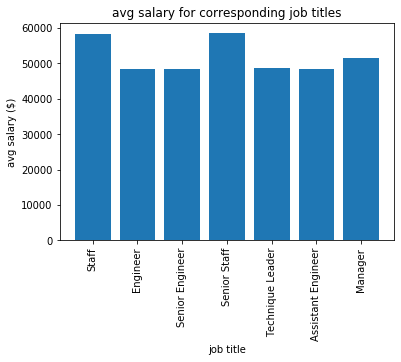

In [5]:
#bar chart of average salary by title, cont.

#create list of unique titles & blank list for corresponding avg salaries
title_list = est_df['title'].unique()
avg_salary_list = []

#create loop to calculate avg salaries per title
for title in title_list:
    
    #isolate data for specified title w/ loc fxn
    job_df = est_df.loc [est_df['title'] == title, :]
    
    #calculate mean salary, append to list
    avg_salary = job_df['salary'].mean()
    avg_salary_list.append (avg_salary)

#create bar chart
plt.bar (title_list,
         avg_salary_list)

#label axes & title, rotate ticks to be legible
plt.xlabel ('job title')
plt.ylabel ('avg salary ($)')
plt.title ('avg salary for corresponding job titles')
plt.xticks (rotation = 90)